In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import datetime

In [122]:
df=pd.read_csv('marketing_data.csv')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# 1. Investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly.

In [124]:
# Some of the column names have spaces before them which are to be removed so that the columns can be consistent in naming
df.columns=df.columns.str.replace(' ','')
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
# Income can be converted to numerical form which helps in analysis
df['Income'] = df['Income'].str.replace(r'\D', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [125]:
df['Education'].head(10)

0    Graduation
1    Graduation
2    Graduation
3    Graduation
4    Graduation
5           PhD
6      2n Cycle
7    Graduation
8           PhD
9           PhD
Name: Education, dtype: object

# 2. Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment. Income values for a few customers are missing. Perform missing value imputation.

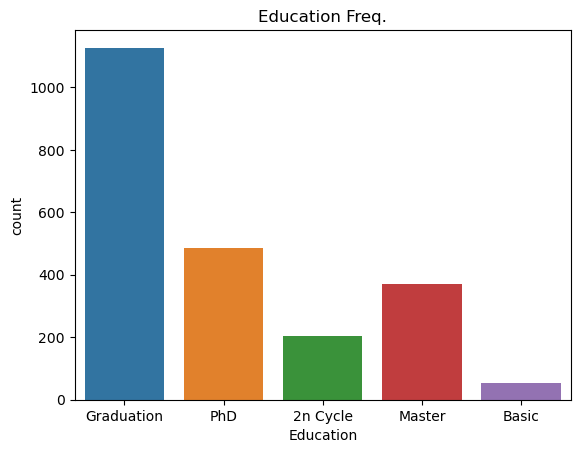

Number of distinct samples according to Education data 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [126]:
sns.countplot(x="Education",data=df)
plt.xticks(rotation=0)
plt.title("Education Freq.")
plt.show()
print(f"Number of distinct samples according to Education data \n{df['Education'].value_counts()}")

'2n cycle' and'master' both denote the same educational level. The European Higher Education Area's (EHEA) Three Cycle System serves as the foundation for this. As a result, the two educational levels will be combined under "master." 'Graduation' is also a little misleading as a degree of education. We'll interpret it as referring to a "undergraduate" education and modify the text appropriately.

In [127]:
df['Education']=df['Education'].apply(lambda x:'Master' if str(x)=='2n Cycle' else str(x))
df['Education']=df['Education'].apply(lambda x:'Undergraduate' if str(x)=='Graduation' else str(x))

In [128]:
df['Education'].head(10)

0    Undergraduate
1    Undergraduate
2    Undergraduate
3    Undergraduate
4    Undergraduate
5              PhD
6           Master
7    Undergraduate
8              PhD
9              PhD
Name: Education, dtype: object

In [129]:
df['Marital_Status'].head(10)

0    Divorced
1      Single
2     Married
3    Together
4      Single
5      Single
6     Married
7    Together
8     Married
9     Married
Name: Marital_Status, dtype: object

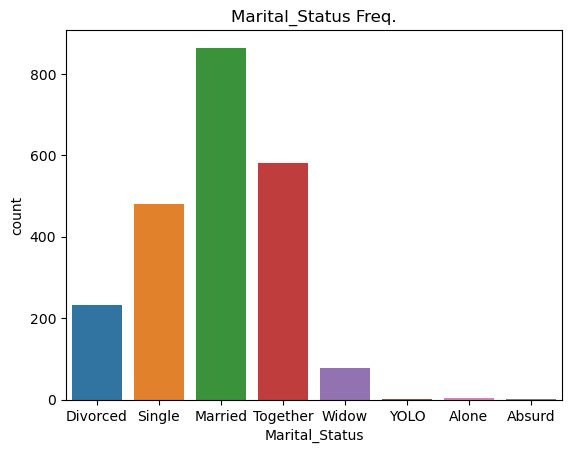

Number of distinct samples according to Marital Status data 
Undergraduate    1127
Master            573
PhD               486
Basic              54
Name: Education, dtype: int64


In [130]:
sns.countplot(x="Marital_Status",data=df)
plt.xticks(rotation=0)
plt.title("Marital_Status Freq.")
plt.show()
print(f"Number of distinct samples according to Marital Status data \n{df['Education'].value_counts()}")

Yolo', 'alone', and 'absurd' are all synonymous with'single' in terms of marital status; so, these statuses will be combined under the single category.

In [131]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'YOLO', 'Absurd'] else str(x))

In [132]:
df['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [133]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

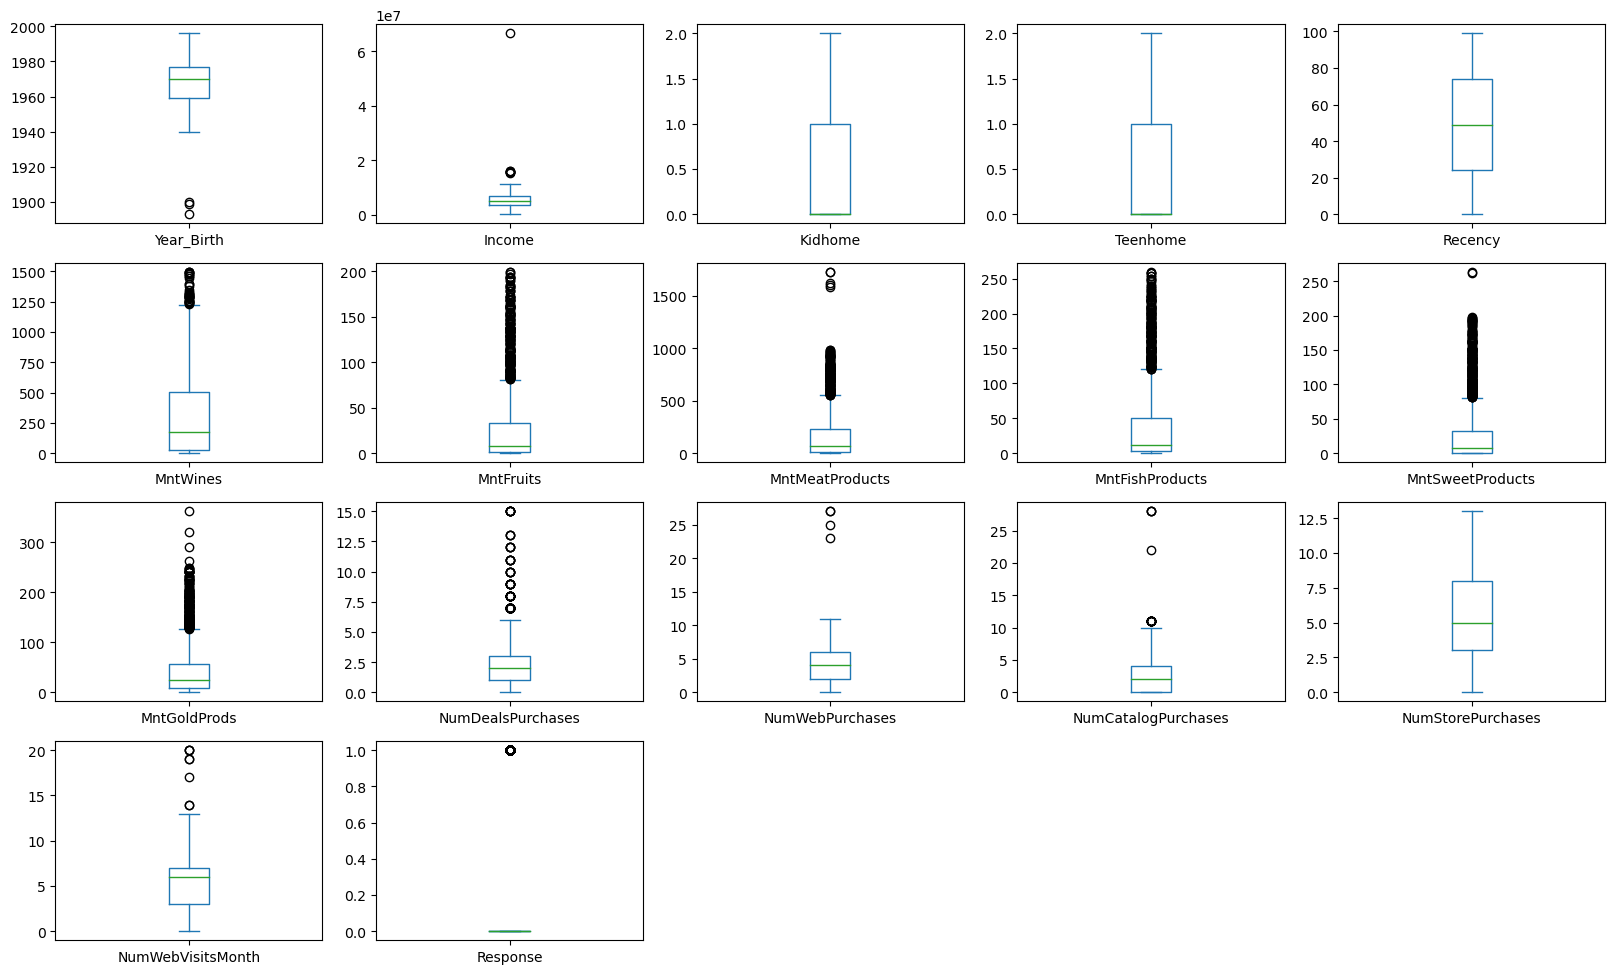

In [134]:
df2 = df.drop(['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain'],axis=1)
num_cols=df2.select_dtypes(include=['number']).columns
df[num_cols].plot(subplots=True,layout=(5,5),kind='box',figsize=(20,15))
plt.show()

<Axes: >

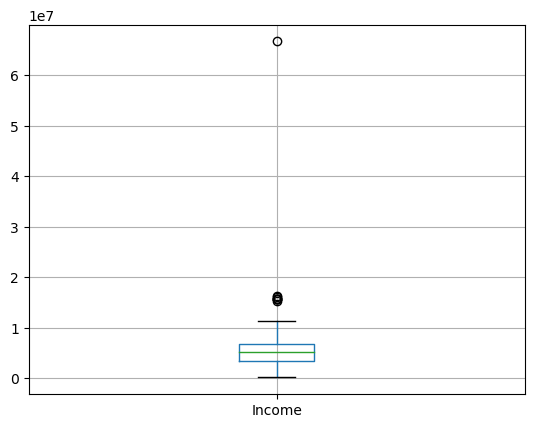

In [135]:
df.boxplot('Income')

<Axes: >

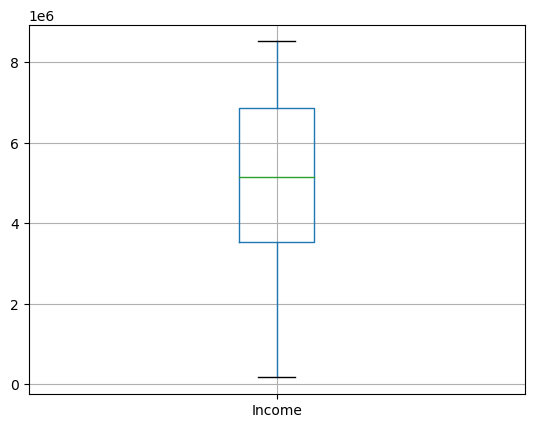

In [136]:
quart1=df['Income'].quantile(0.25)
quart3=df['Income'].quantile(0.75)
IQR=quart3-quart1
LB=quart1-1.5*IQR
UB=quart1+1.5*IQR
df['Income'].mask(df['Income']>UB,UB,inplace=True)
df.boxplot('Income')

<Axes: >

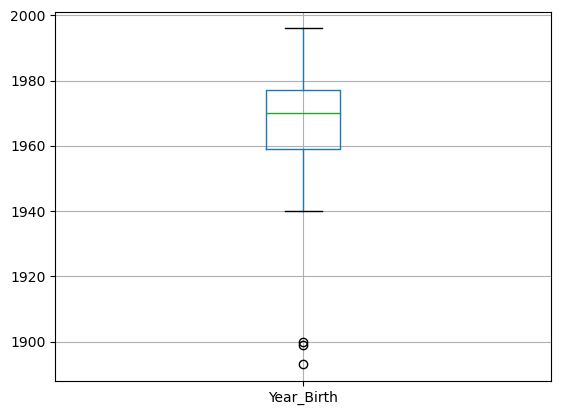

In [137]:
df.boxplot('Year_Birth')

<Axes: >

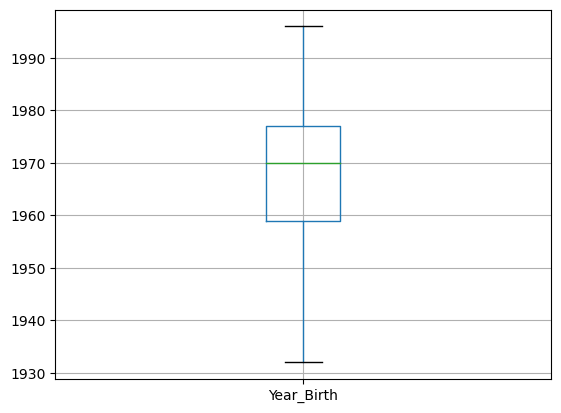

In [138]:
quart1=df['Year_Birth'].quantile(0.25)
quart3=df['Year_Birth'].quantile(0.75)
IQR=quart3-quart1
LB=quart1-1.5*IQR
UB=quart1+1.5*IQR
df['Year_Birth'].mask(df['Year_Birth']<LB,LB,inplace=True)
df.boxplot('Year_Birth')

<Axes: xlabel='Income', ylabel='Density'>

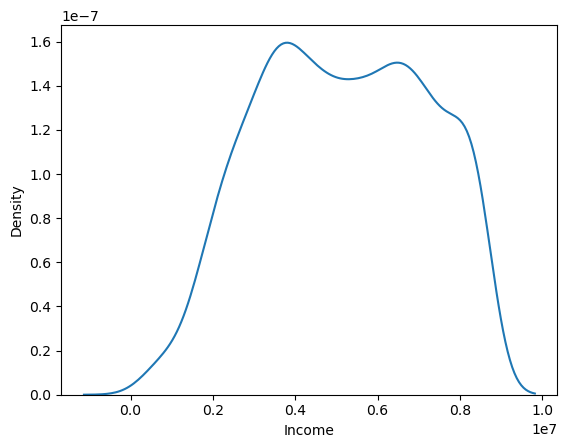

In [139]:
sns.kdeplot(data=df, x="Income")

In [140]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status. 

In [141]:
df1 = df[["Education", 'Marital_Status']].value_counts().groupby(["Education", "Marital_Status"]).sum().reset_index().sort_values(by=['Education','Marital_Status'], ascending=False)
df1 = (df1.pivot(index='Education', columns='Marital_Status', values=0))
df1

Marital_Status,Divorced,Married,Single,Together,Widow
Education,,,,,
Basic,1,20,18,14,1
Master,60,219,114,163,17
PhD,52,192,101,117,24
Undergraduate,119,433,254,286,35


In [142]:
uniq_comb_edu=pd.unique(df.Education)
uniq_comb_MS=pd.unique(df.Marital_Status)
temp_dt=df.copy()
df_mean = np.round(np.mean(temp_dt['Income']),2)
for e in uniq_comb_edu:
    for m in uniq_comb_MS:
        filter=(temp_dt.Education==e)&(temp_dt.Marital_Status == m)
        filtered_dt=temp_dt[filter]
        
        mean=np.round(np.mean(filtered_dt['Income']), 2)
        
        if ~np.isnan(mean): 
            filtered_dt['Income']=filtered_dt['Income'].fillna(mean)
            print(f"Missing Value in 'Income' column filled with {mean} when Education:{e} and Marital Status: {m}")
        else: 
            filtered_dt['Income']=filtered_dt['Income'].fillna(df_mean)
            print(f"Missing Value in 'Income' column filled with {df_mean} when Education:{e} and Marital Status: {m}")
        
        temp_dt[filter]=filtered_dt
df = temp_dt.copy()    

Missing Value in 'Income' column filled with 5375741.18 when Education:Undergraduate and Marital Status: Divorced
Missing Value in 'Income' column filled with 5100334.48 when Education:Undergraduate and Marital Status: Single
Missing Value in 'Income' column filled with 5064089.28 when Education:Undergraduate and Marital Status: Married
Missing Value in 'Income' column filled with 5319421.4 when Education:Undergraduate and Marital Status: Together
Missing Value in 'Income' column filled with 5496270.0 when Education:Undergraduate and Marital Status: Widow
Missing Value in 'Income' column filled with 5293253.85 when Education:PhD and Marital Status: Divorced
Missing Value in 'Income' column filled with 5253513.13 when Education:PhD and Marital Status: Single
Missing Value in 'Income' column filled with 5681974.21 when Education:PhD and Marital Status: Married
Missing Value in 'Income' column filled with 5516830.17 when Education:PhD and Marital Status: Together
Missing Value in 'Income'

In [143]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

# 3. Create variables to populate the total number of children, age, and total spending.

In [144]:
df['Age'] = datetime.datetime.now().year - df['Year_Birth']
df['Children_Count_Home'] = df['Kidhome'] + df['Teenhome']
df['Total_Spending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [145]:
df['Age'].head(10)

0    54
1    63
2    66
3    57
4    35
5    66
6    70
7    57
8    70
9    70
Name: Age, dtype: int64

In [146]:
df['Children_Count_Home'].head(10)

0    0
1    0
2    1
3    2
4    1
5    0
6    0
7    1
8    1
9    1
Name: Children_Count_Home, dtype: int64

In [147]:
df['Total_Spending'].head(10)

0    1190
1     577
2     251
3      11
4      91
5    1192
6    1215
7      96
8     544
9     544
Name: Total_Spending, dtype: int64

# 4. Use ordinal encoding and one hot encoding according to different types of categorical variables.

In [148]:
dropped_columns=df[['ID', 'Year_Birth','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain']]
dropped_columns.head(10)

,ID,Year_Birth,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,1826,1970,0,0,0,0,0,0,0,0
1,1,1961,0,0,0,0,0,0,1,0
2,10476,1958,0,1,0,0,0,0,0,0
3,1386,1967,1,1,0,0,0,0,0,0
4,5371,1989,1,0,1,0,0,0,0,0
5,7348,1958,0,0,0,0,0,0,0,0
6,4073,1954,0,0,1,0,0,0,0,0
7,1991,1967,0,1,0,0,0,0,0,0
8,4047,1954,0,1,0,0,0,0,0,0
9,9477,1954,0,1,0,0,0,0,0,0


In [86]:
df = df.drop(['ID', 'Year_Birth','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],axis=1)

In [87]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Country', 'Age',
       'Children_Count_Home', 'Total_Spending'],
      dtype='object')

In [88]:
df.Education.unique().tolist()

['Undergraduate', 'PhD', 'Master', 'Basic']

In [149]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

dt = pd.DataFrame({"Levels":df.Education.unique().tolist()})
encoder = OrdinalEncoder(categories=[df.Education.unique().tolist()])
df['Education1']=encoder.fit_transform(df[['Education']])
print(encoder.categories_)

df = pd.get_dummies(df, columns=[ "Marital_Status"])
df.head(10)

[array(['Undergraduate', 'PhD', 'Master', 'Basic'], dtype=object)]


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children_Count_Home,Total_Spending,Education1,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,Undergraduate,8483500.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,54,0,1190,0.0,1,0,0,0,0
1,1,1961,Undergraduate,5709100.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,63,0,577,0.0,0,0,1,0,0
2,10476,1958,Undergraduate,6726700.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,66,1,251,0.0,0,1,0,0,0
3,1386,1967,Undergraduate,3247400.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,57,2,11,0.0,0,0,0,1,0
4,5371,1989,Undergraduate,2147400.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,35,1,91,0.0,0,0,1,0,0
5,7348,1958,PhD,7169100.0,0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP,66,0,1192,1.0,0,0,1,0,0
6,4073,1954,Master,6356400.0,0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER,70,0,1215,2.0,0,1,0,0,0
7,1991,1967,Undergraduate,4493100.0,0,1,2014-01-18,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP,57,1,96,0.0,0,0,0,1,0
8,4047,1954,PhD,6532400.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US,70,1,544,1.0,0,1,0,0,0
9,9477,1954,PhD,6532400.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND,70,1,544,1.0,0,1,0,0,0


# 5. Create a heat-map to showcase the correlation between different pairs of variables.

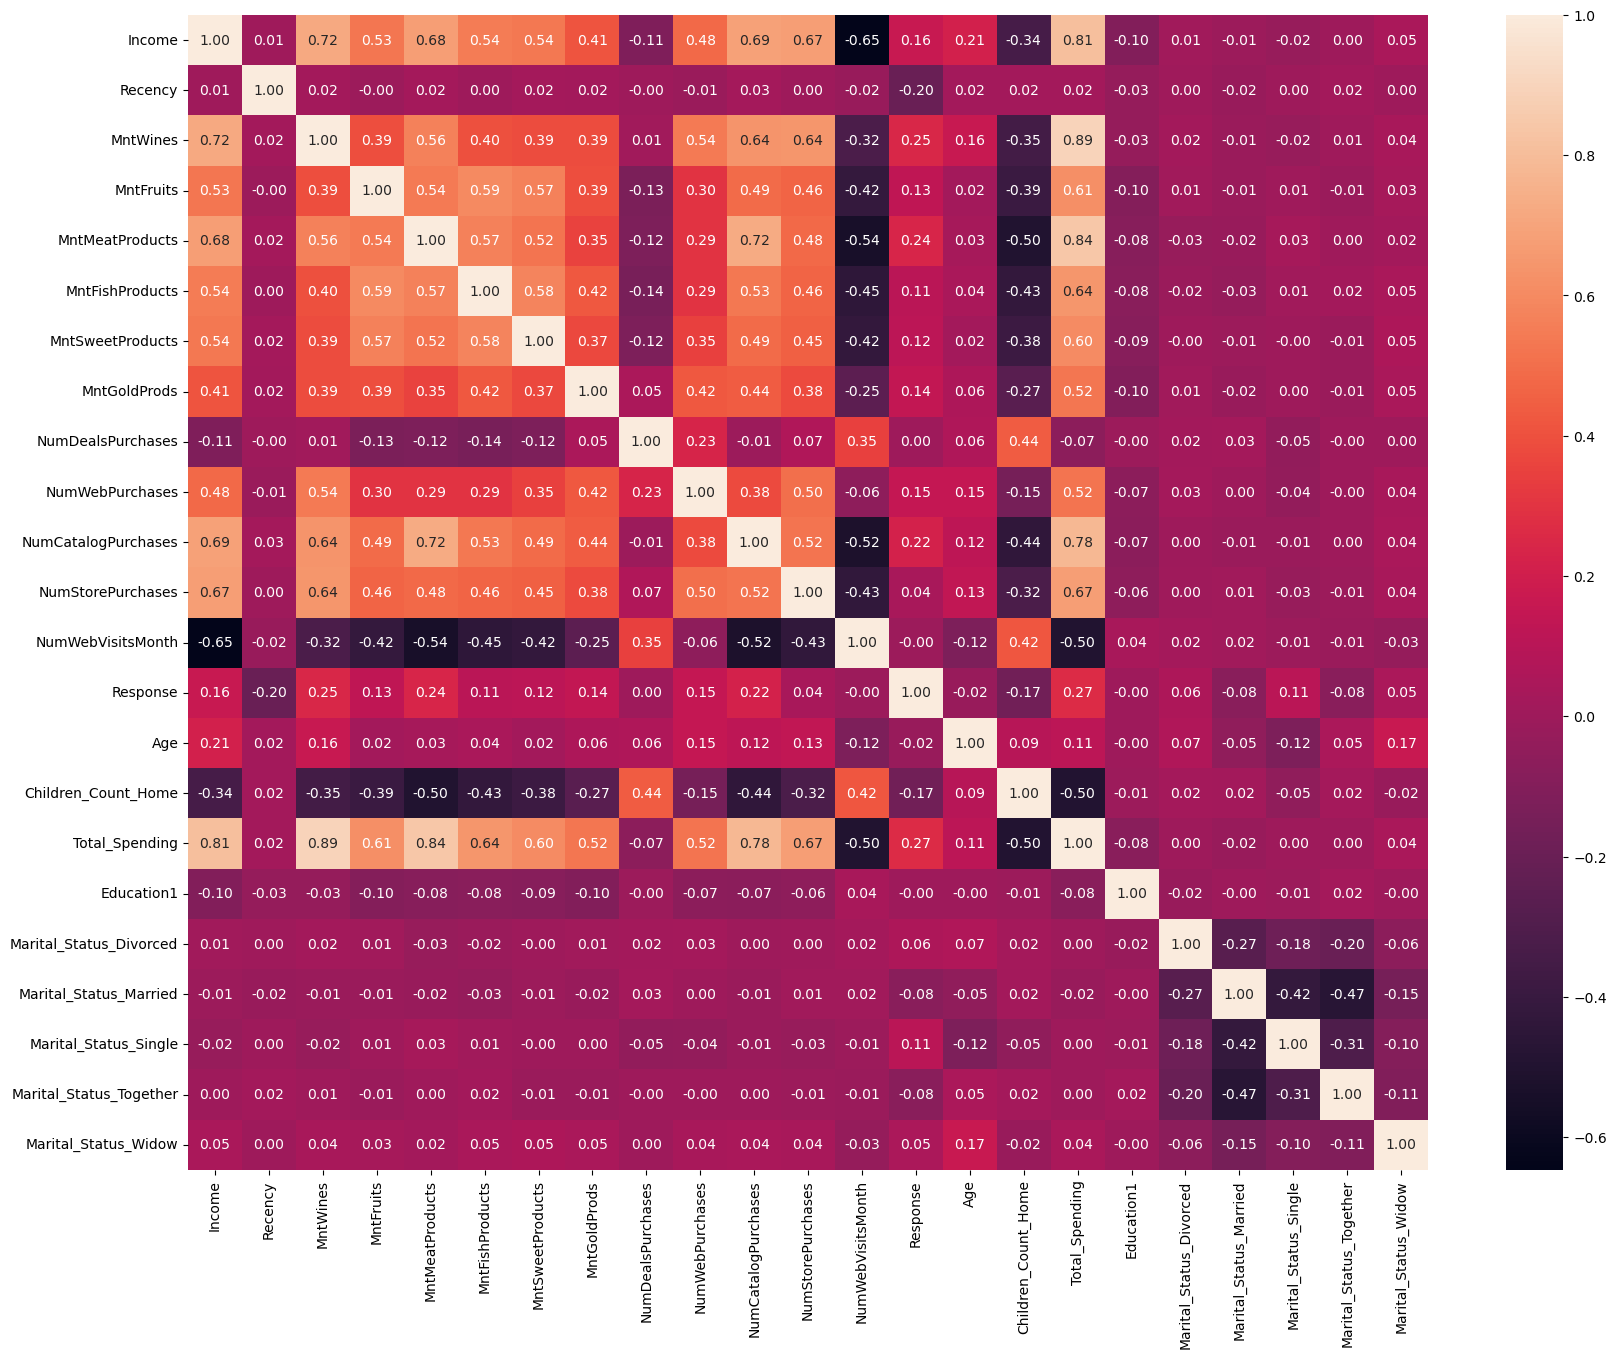

In [90]:
corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

In [91]:
df.corr()['Response'].sort_values(ascending=False)

Response                   1.000000
Total_Spending             0.265298
MntWines                   0.247254
MntMeatProducts            0.236335
NumCatalogPurchases        0.220810
Income                     0.161657
NumWebPurchases            0.148730
MntGoldProds               0.139850
MntFruits                  0.125289
MntSweetProducts           0.117372
MntFishProducts            0.111331
Marital_Status_Single      0.110555
Marital_Status_Divorced    0.055147
Marital_Status_Widow       0.051723
NumStorePurchases          0.039363
NumDealsPurchases          0.002238
Education1                -0.003467
NumWebVisitsMonth         -0.003987
Age                       -0.020058
Marital_Status_Together   -0.075770
Marital_Status_Married    -0.079378
Children_Count_Home       -0.169163
Recency                   -0.198437
Name: Response, dtype: float64

# 6. Test the following hypotheses:

## (a).  Older people are not as tech-savvy and probably prefer shopping in-store.

In [92]:
df_age=df[['Age','NumWebPurchases','NumStorePurchases']]
df_age.loc[(df_age['Age']<=25),'Age_Bucket']='Young'
df_age.loc[(df_age['Age']>28) & (df_age['Age']<=50),'Age_Bucket']='Middle Age'
df_age.loc[(df_age['Age']>50),'Age_Bucket']='Old'

In [93]:
df_age_plot=df_age[["Age_Bucket",'NumWebPurchases','NumStorePurchases']].groupby(["Age_Bucket"]).sum()
df_age_plot

,NumWebPurchases,NumStorePurchases
Age_Bucket,,
Middle Age,3091,4554
Old,6055,8411


<Axes: xlabel='Age_Bucket'>

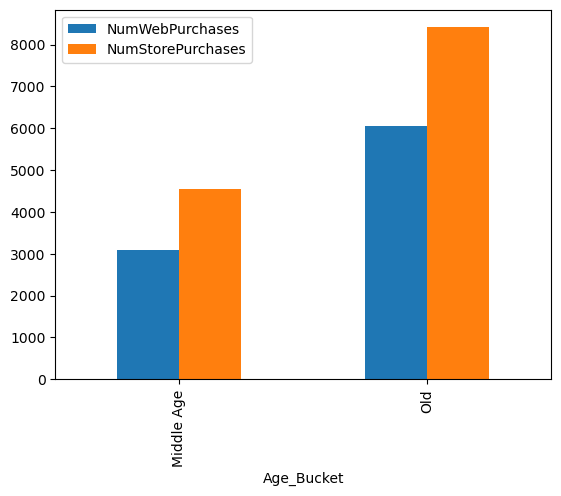

In [94]:
df_age_plot.plot.bar()

Older people have more in-store purchases than Online purchases.

## (b) Customers with kids probably have less time to visit a store and would prefer to shop online.

In [95]:
df_children=df[['Children_Count_Home','NumWebPurchases','NumStorePurchases']]
df_children_plot=df_children.groupby(["Children_Count_Home"]).sum() 
df_children_plot

,NumWebPurchases,NumStorePurchases
Children_Count_Home,,
0,2803,4635
1,4834,6310
2,1361,1815
3,152,210


<Axes: xlabel='Children_Count_Home'>

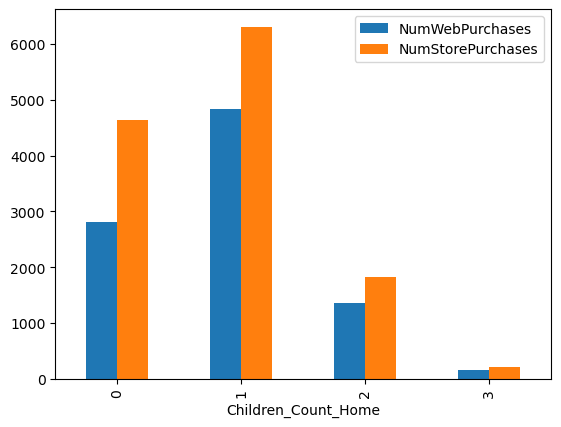

In [96]:
df_children_plot.plot.bar()

Parents who have two or more kids appear to spend very little money on shopping. These parents prefer to shop in-store, although there is a growing trend of them making more online purchases.

## (c) Other distribution channels may cannibalize sales at the store.

([<matplotlib.patches.Wedge at 0x1375b365810>,
 [Text(0.9698058573993448, 0.5191113550616302, 'Deals'),
  Text(-0.29933747437362795, 1.0584881087832863, 'Online'),
  Text(-1.090577484984908, -0.14366888752960116, 'Catalog'),
  Text(0.3739290163314566, -1.0344936397800566, 'Store')])

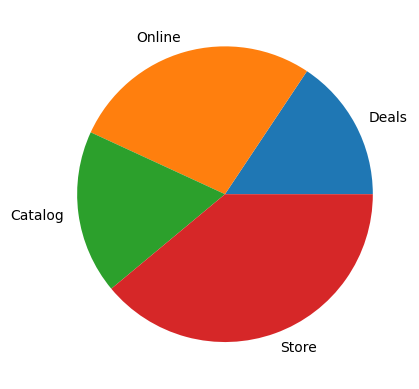

In [97]:
labels=['Deals','Online','Catalog','Store']
sizes=[df.NumDealsPurchases.sum(),
         df.NumWebPurchases.sum(),
         df.NumCatalogPurchases.sum(),
         df.NumStorePurchases.sum()]

fig,ax=plt.subplots()
ax.pie(sizes, labels=labels)

Out of all the distribution channels, the Store has the most sales. Nevertheless, the combined sales of all the distribution channels exceed those of the store.

In [98]:
df.columns

Index(['Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Country', 'Age', 'Children_Count_Home', 'Total_Spending',
       'Education1', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

## (d) Does the US fare significantly better than the rest of the world in terms of total purchases?

In [150]:
total_purchases=df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Country']]
total_purchases.head(10)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country
0,1,4,4,6,SP
1,1,7,3,7,CA
2,1,3,2,5,US
3,1,1,0,2,AUS
4,2,3,1,2,SP
5,1,4,7,5,SP
6,1,10,10,7,GER
7,1,2,1,3,SP
8,3,6,2,9,US
9,3,6,2,9,IND


In [151]:
total_purchases['Total_Purchases']=total_purchases['NumDealsPurchases']+total_purchases['NumWebPurchases']+total_purchases['NumCatalogPurchases']+total_purchases['NumStorePurchases']
total_purchases.head(10)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country,Total_Purchases
0,1,4,4,6,SP,15
1,1,7,3,7,CA,18
2,1,3,2,5,US,11
3,1,1,0,2,AUS,4
4,2,3,1,2,SP,8
5,1,4,7,5,SP,17
6,1,10,10,7,GER,28
7,1,2,1,3,SP,7
8,3,6,2,9,US,20
9,3,6,2,9,IND,20


In [101]:
avg_purchases_per_country = total_purchases.groupby('Country').agg(Total_Purchases = ('Total_Purchases','sum'))
avg_purchases_per_country

,Total_Purchases
Country,
AUS,2314
CA,4101
GER,1788
IND,2099
ME,59
SA,5117
SP,16052
US,1761


In [102]:
avg_purchases_per_country['Total_Customers']=total_purchases['Country'].value_counts()
avg_purchases_per_country

,Total_Purchases,Total_Customers
Country,,
AUS,2314,160
CA,4101,268
GER,1788,120
IND,2099,148
ME,59,3
SA,5117,337
SP,16052,1095
US,1761,109


In [103]:
avg_purchases_per_country['Purchases_Per_Customer']=np.floor(avg_purchases_per_country['Total_Purchases']/avg_purchases_per_country['Total_Customers'])
avg_purchases_per_country

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0
CA,4101,268,15.0
GER,1788,120,14.0
IND,2099,148,14.0
ME,59,3,19.0
SA,5117,337,15.0
SP,16052,1095,14.0
US,1761,109,16.0


In [104]:
avg_purchases_per_country.assign(country = avg_purchases_per_country.index.get_level_values('Country'))
avg_purchases_per_country

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0
CA,4101,268,15.0
GER,1788,120,14.0
IND,2099,148,14.0
ME,59,3,19.0
SA,5117,337,15.0
SP,16052,1095,14.0
US,1761,109,16.0


In [105]:
avg_purchases_per_country.reset_index(inplace=True)
avg_purchases_per_country

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
0,AUS,2314,160,14.0
1,CA,4101,268,15.0
2,GER,1788,120,14.0
3,IND,2099,148,14.0
4,ME,59,3,19.0
5,SA,5117,337,15.0
6,SP,16052,1095,14.0
7,US,1761,109,16.0


In [106]:
avg_purchases_per_country=avg_purchases_per_country.sort_values(by = 'Total_Purchases', ascending = False)
avg_purchases_per_country

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
6,SP,16052,1095,14.0
5,SA,5117,337,15.0
1,CA,4101,268,15.0
0,AUS,2314,160,14.0
3,IND,2099,148,14.0
2,GER,1788,120,14.0
7,US,1761,109,16.0
4,ME,59,3,19.0


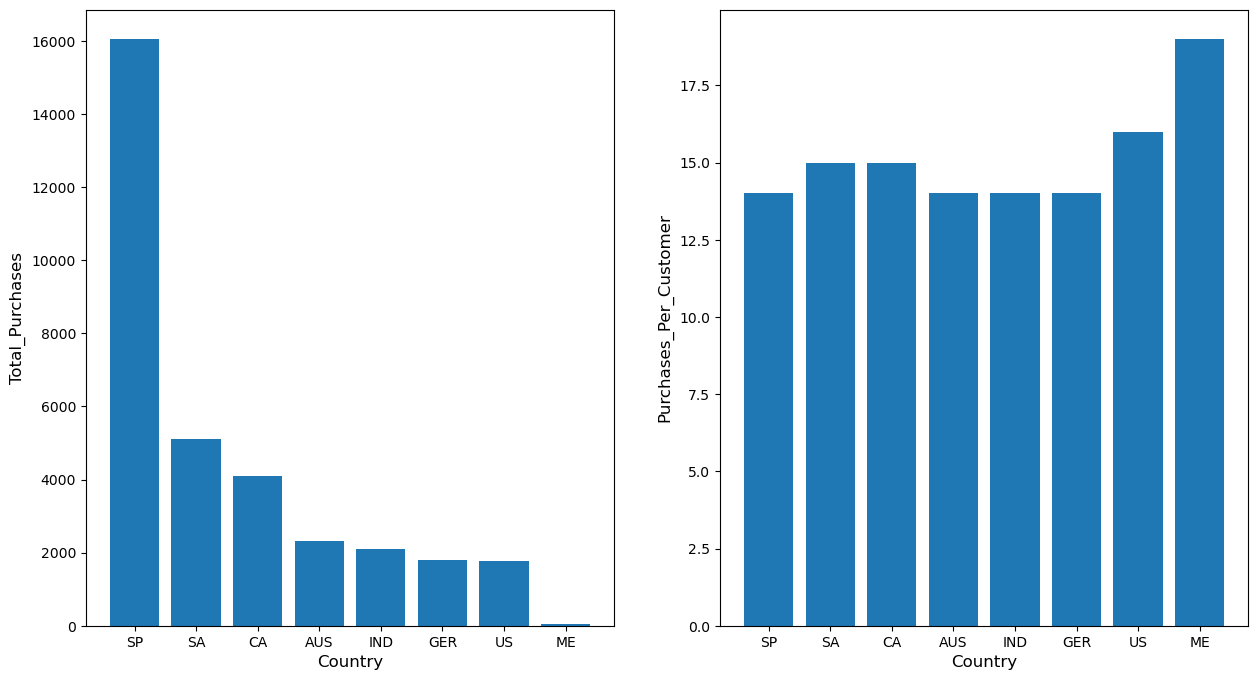

In [107]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15, 8))
ax1.bar(x=avg_purchases_per_country['Country'], 
        height=avg_purchases_per_country['Total_Purchases'])
ax1.set_xlabel('Country', fontsize=12)
ax1.set_ylabel('Total_Purchases',fontsize=12) 
ax2.bar(x=avg_purchases_per_country['Country'],
       height=avg_purchases_per_country['Purchases_Per_Customer'])
ax2.set_xlabel('Country',fontsize=12)
ax2.set_ylabel('Purchases_Per_Customer',fontsize=12) 
plt.show()

It appears that the USA is not in a good spot with regards to the total number of purchases. According to the data, it's the lowest (with the exception of ME, which has only three data records). However, the USA leads the list when it comes to purchases made per inhabitant in that nation.

# 7. Use appropriate visualization to help analyze the following:

## (a) Which products are performing the best, and which are performing the least in terms of revenue?

In [108]:
total_revenue_plot=df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()
total_revenue_plot

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

<Axes: >

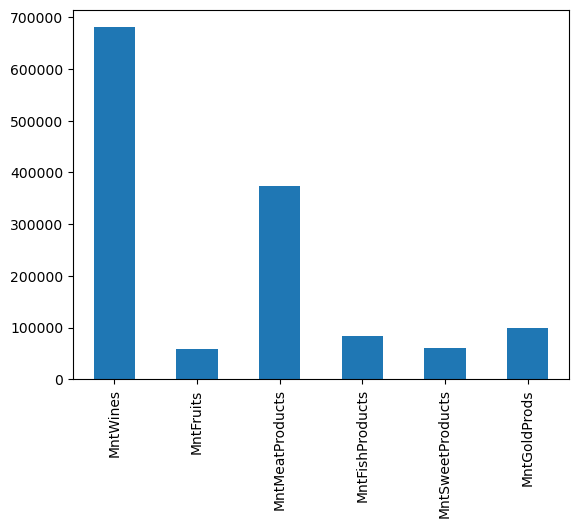

In [109]:
total_revenue_plot.plot.bar(x='Amount_Spent',y='Revenue',)

Among all the commodities that customers spend on, Wines lead the revenue scale followed by Meat Products.

## (b) Do you see any pattern in the no. of children at home and total spend?

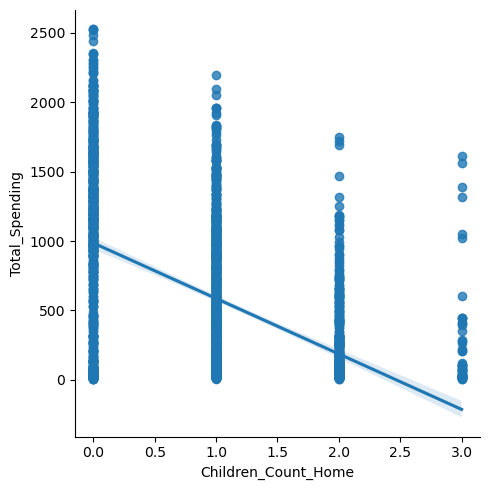

In [110]:
sns.lmplot(x='Children_Count_Home',y='Total_Spending',data=df)

According to the trend-line in th above plot the inference seems to be that as customers have more children there total spending decreases.

## (c) Education background of the customers who complained in the last 2 years.

In [111]:
customer_data=df[['Dt_Customer','Education']]
complaint=dropped_columns['Complain']
Complaint_last_2_years=pd.concat([customer_data, complaint], axis=1)

In [152]:
Complaint_last_2_years.head(10)

,Dt_Customer,Education,Complain
0,2014-06-16,Undergraduate,0
1,2014-06-15,Undergraduate,0
2,2014-05-13,Undergraduate,0
3,2014-05-11,Undergraduate,0
4,2014-04-08,Undergraduate,0
5,2014-03-17,PhD,0
6,2014-01-29,Master,0
7,2014-01-18,Undergraduate,0
8,2014-01-11,PhD,0
9,2014-01-11,PhD,0


In [153]:
latest_date=Complaint_last_2_years['Dt_Customer'].max()
two_years_ago=latest_date - pd.DateOffset(years=2)
filtered_Complaint_last_2_years=Complaint_last_2_years[(Complaint_last_2_years['Dt_Customer'] >= two_years_ago) & (Complaint_last_2_years['Complain'] > 0)]
education_background=filtered_Complaint_last_2_years['Education'].unique()
print("Education background of customers who complained in the last 2 years from the latest date:")
print(education_background)

Education background of customers who complained in the last 2 years from the latest date:
['Master' 'Undergraduate' 'PhD']
